# Manually set the location directory for files in part A and C

# A1. Investigating the Population Data

[Question]

1) In Python (or R) plot the population of Victoria, New South Wales and Queensland over time.
(HINT: You don't need to put the dates on the x-axis, just showing the index of each quarter is
fine.)

     a) Are the population values increasing or decreasing over time?
     b) Does the population data exhibit a trend and if so, what type?
    

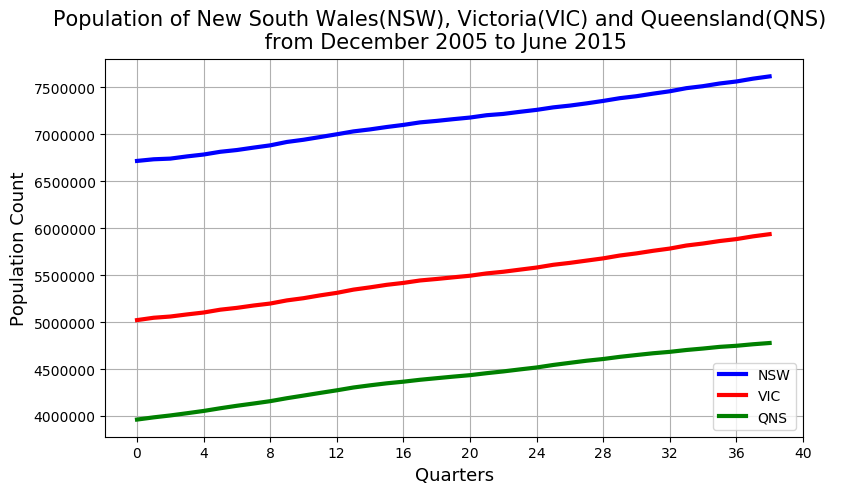

In [1]:
# Import the required libraries
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import datetime
%matplotlib inline

# Edit the CSV files removing the unnecessary columns. The rquired columns are renamed to 
# 'Quarter', 'NSW', 'VIC', 'QNS', 'SAU', 'WAU', 'TAS','NTR', 'ACT'

# Setting the location of the file to read from 
location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\1\Assignment1Files\Assignment1Files' \
           r'\EstimatedResidentPopulationByStateAndGender.csv'

population_report = pd.read_csv(location, header=0, names=['Quarter', 'NSW', 'VIC', 'QNS', 'SAU', 'WAU', 'TAS','NTR', 'ACT'])

# Plotting the graph
fig = plt.figure(figsize=(9, 5), dpi=100)
fig.suptitle('Population of New South Wales(NSW), Victoria(VIC) and Queensland(QNS) \n from December 2005 to June 2015',
              fontsize=15)

plt.plot(population_report.NSW,  color="blue", linewidth=3, linestyle="-", label="NSW")
plt.plot(population_report.VIC, color="red", linewidth=3, linestyle="-", label="VIC")
plt.plot(population_report.QNS,  color="green", linewidth=3, linestyle="-", label="QNS")

plt.xlabel('Quarters', fontsize=13)
plt.ylabel('Population Count', fontsize=13)
plt.xticks(np.arange(0, len(population_report.Quarter) + 5 , 4))
plt.legend(loc='lower right')

plt.grid()
plt.show()

[Question]

2) Fit a linear regression using Python (or R) to the Victorian population data and plot the linear fit.
(HINT: In Python you can use the "range(1,n)" function to generate a sequence of integer
values: 1,2,...,n.)

    a) Does the linear fit look good?
    b) Use the linear fit to predict the resident population in Victoria for the dates: 1/9/15, 1/12/15,
        1/12/16, and 1/12/17.

In [ ]:
# define the indexes for the various quartes and store them in the dataframe quarter_set
natural_numbers =population_report.shape[0]
quarter_set = pd.DataFrame({'quarter':[x for x in range(0,natural_numbers)]})

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(quarter_set.quarter, population_report.VIC)
line = [slope*xi + intercept for xi in quarter_set.quarter]

# Fuction to Calculate the quarter number in terms of indexes 
def quarter_calculator (v_month,v_year):
    diff_year = v_year - 5
    new_quarter = (month//4 + 1) * diff_year 
    return new_quarter

# Fucntion to Calculate the predicted population using the slope intercept values received from Linear Regression
def predict_population (v_quarter, v_slope, v_intercept):
    pred_population = (v_slope * v_quarter) + v_intercept
    return pred_population

# Plotting the linear regression line and the scatter plot
fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Linear regression to predict the population of Victoria', fontsize=15)

plt.xlabel('Quarters', fontsize=13)
plt.ylabel('Population', fontsize=13)
plt.xticks(np.arange(0, len(population_report.Quarter) + 5 , 4))

plt.plot(quarter_set.quarter,line,'r-', linewidth=2,label="Best Fit line" )
plt.scatter(quarter_set.quarter, population_report.VIC , marker='o', color='blue')
plt.legend(loc='lower right')

plt.grid()
plt.show()

In [ ]:
# Requests user to input the date for prediction
date_entry = input('Enter a date in DD/mm/yy format: \t')

# Slices the day month year from the input value
day, month, year = map(int, date_entry.split('/'))

# Predict the population
calc_quarter = quarter_calculator(month,year)
value = predict_population(calc_quarter,slope,intercept)

print ("The predicted popultion count is : ", value )
print (slope)
print(intercept)

# A2. Investigating the Job Vacancies Data

[Question]

1) Use Python (or R) to plot the job vacancy counts for Victoria over time. (HINT: Pandas contains a "transpose()" method and Excel can also be used to transpose data.)

    a) What are the maximum and minimum values for job vacancies in Victoria over the time period?

In [ ]:
# Setting the location of the file to read from 
location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\1\Assignment1Files\Assignment1Files' \
           r'\JobVacancies.csv'

# Read the .CSV file from the above location 
job_vacancy = pd.read_csv(location, skipinitialspace=True)
duration = pd.DataFrame({'Years':list(job_vacancy)[1:]})
job_vacancy.set_index('State',inplace=True)

# Transpose the columns and rows
job_vacancy = job_vacancy.transpose()

job_vacancy.reset_index(drop=True, inplace=True)
job_vacancy = pd.concat([duration, job_vacancy], axis=1)

# To calculate the minimun and th maximum of the 
vac_max = job_vacancy .VIC.max()
vac_min = job_vacancy .VIC.min()

In [ ]:
# Plotting the graph
fig = plt.figure(figsize=(9, 5), dpi=100)
fig.suptitle('Job vacancies in Victoria from Jan 2006 to October 2016', fontsize=15)

plt.xlabel('Time series in months', fontsize=13)
plt.ylabel('Job Vacancies', fontsize=13)
plt.plot(job_vacancy.VIC,  color="blue", linewidth=2, linestyle="-", label="VIC")

plt.legend(loc='lower right')
plt.grid()
plt.show()

print('Maximum vacancy: ',vac_max)
print('Minimum vacancy: ',vac_min)

[Question]

2) Fit a linear regression to the data and plot it.

    a) Does it look like a good fit to you? Would you believe the predictions of the linear model
    going forward?
    
    b) Instead of fitting the linear regression to all of the data, try fitting it to just the most recent
    datapoints (say from the 85th datapoint onwards). How is the fit? Which model would give
    better predictions of future vacancies do you think?

In [ ]:
# define the indexes for the various years and store them in the dataframe year_set
natural_numbers =job_vacancy.shape[0]
year_set = pd.DataFrame({'series':[s for s in range(0,natural_numbers) ]})

slope1, intercept1, r_value1, p_value1, std_err1 = linregress(year_set.series, job_vacancy.VIC)
line1 = [slope1 * xi + intercept1 for xi in year_set.series]

# Linear Regression
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(job_vacancy.VIC[84:].index, job_vacancy.VIC[84:])
line2 = [slope2 * xi + intercept2 for xi in year_set.series[84:]]

# Plotting the data
fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Linear regression to predict the job vacancies in Victoria [Dataset : Full]', fontsize=15)

plt.xlabel('Time series', fontsize=13)
plt.ylabel('Vacancies', fontsize=13)
plt.xticks(np.arange(0, len(job_vacancy.VIC) + 5 , 10))

plt.plot(year_set.series,line1,'r-', linewidth=2,label="All data fit" )
plt.plot(year_set.series[84:],line2,'g-', linewidth=2,label="Latest data fit" )

# Scatter Plot
plt.scatter(year_set.series, job_vacancy.VIC , marker='.', color='blue')
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [ ]:
# Plotting the data
fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Linear regression to predict the job vacancies in Victoria [Dataset : 85 onwards]', fontsize=15)

plt.plot(year_set.series[84:],line2,'g-', linewidth=2, label="Selected data fit" )
scat = plt.scatter(year_set.series[84:], job_vacancy.VIC[84:] , marker='.', color='blue')

plt.xlabel('Time series', fontsize=13)
plt.ylabel('Vacancies', fontsize=13)
plt.xticks(np.arange(84, len(job_vacancy.VIC) + 5 , 10))
plt.legend(loc='lower right')

plt.grid()
plt.show()

# A3. Investigating the Unemployment Data

1. Use Python (or R) to plot the Unemployment Rate for Victoria over time.

    a) It looks like the rate has been very high at times in the past. What was the maximum
    unemployment rate in Victoria recorded in the dataset and when did that occur?

In [ ]:
# Edit the CSV files renaming the states in State/Territory columns. The rquired values are renamed to 
# 'Quarter', 'NSW', 'VIC', 'QNS', 'SAU', 'WAU', 'TAS','NTR', 'ACT'

# Setting the location of the file to read from 
location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\1\Assignment1Files\Assignment1Files' \
           r'\EmploymentTimeSeries.xls'

# Storing the value of the excel in the dataframe unemployment_report
unemployment_report = pd.read_excel(location, skipinitialspace=True, sheetname='Time_Series', names=['State','Dates','Emp_rate','UnEmp_rate','Participate_rate'])


# To calculate the max unemployment in VIC
max_unemp_rate = unemployment_report[(unemployment_report.State == 'VIC')].UnEmp_rate.max()

# To calculate the date of the max unemployment in VIC
times =  unemployment_report[(unemployment_report.UnEmp_rate == max_unemp_rate)].Dates.to_string(index=False)

# Plot the graph
fig = plt.figure(figsize=(11, 5), dpi=100)
fig.suptitle('Unemployment trends in Victoria over the years', fontsize=15)

plt.plot(unemployment_report[(unemployment_report.State== 'VIC')].Dates,unemployment_report[(unemployment_report.State == 'VIC')].UnEmp_rate,
              color="blue", linewidth=2, linestyle="-", label="VIC")

plt.xlabel('Years', fontsize=13)
plt.ylabel('Unemployment Rate', fontsize=13)
plt.legend(loc='upper right')

plt.grid()
plt.show()

print ('[Answers]\n')
print('\t1a) The maximum unemployment rate was: ',max_unemp_rate,' during the year',times )

# Visualising the Relationship between Unemployment and Job Vacancies

Now let's look at the relationship between unemployment levels and job vacancies.

1. Use Python (or R) to combine the data from the different files into a single table. The table
should contain population values, job vacancy counts and unemployment rates for the different
dates and different States/Territories.

    a) What is the first date and last date for the combined data?


In [ ]:
#The three dataframes are made similar by renaming the columns and then merged together

job_vacancy.rename(columns={'SA': 'SAU'}, inplace=True)
job_vacancy.rename(columns={'WA': 'WAU'}, inplace=True)
job_vacancy.rename(columns={'QLD': 'QNS'}, inplace=True)
job_vacancy.rename(columns={'NT': 'NTR'}, inplace=True)

tomerge_job = pd.melt(job_vacancy, id_vars=['Years'],value_vars=['NSW','VIC','QNS','SAU','WAU','TAS','NTR','ACT'], 
                    var_name='Statesj')
tomerge_job.rename(columns={'value': 'Vacancy'}, inplace=True)
tomerge_pop = pd.melt(population_report, id_vars=['Quarter'],value_vars=['NSW','VIC','QNS','SAU','WAU','TAS','NTR','ACT'], 
                    var_name='Statesp')
tomerge_pop.rename(columns={'value': 'Population'}, inplace=True)
unemployment_report['Dates'] = pd.to_datetime(unemployment_report.Dates).dt.strftime('%d-%m-%Y')

Intermediate_merge = pd.merge(tomerge_pop, tomerge_job,  how='inner', 
                        left_on=['Quarter','Statesp'], right_on = ['Years','Statesj'])
Final_merge  = pd.merge(Intermediate_merge, unemployment_report,  how='inner', 
                        left_on=['Quarter','Statesp'], right_on = ['Dates','State'])

Merged_report = Final_merge[['Years', 'State', 'Population','UnEmp_rate','Vacancy']].copy()


In [ ]:
min_date = pd.to_datetime(Merged_report['Years']).min()
max_date = pd.to_datetime(Merged_report['Years']).max()
print("The max date is: ", max_date)
print("The min date is: ", min_date)

2.Now that you have the data aggregated, we can see whether there is a relationship between
unemployment and the number of job vacancies. Plot the values against each other.

    a) Can you see a relationship there?
 3. Try selecting and plotting only the data from Victoria.

    a) Can you see a relationship now? If so, what relationship is there?
    
    
4. The different populations across the states will influence the number of job vacancies in each.
Remove this effect by introducing a new column called 'Vacancy Rate' which contains the
vacancy count divided by the population size, multiplied by 100
    
    a)Is there a relationship

In [ ]:
#initial relation
Merged_report.head()

fig = plt.figure(figsize=(11, 5), dpi=100)
fig.suptitle('Vacancy Vs Unemployment for all the states from 2005 ', fontsize=15)

plt.scatter(Merged_report.UnEmp_rate, Merged_report.Vacancy, color="red",marker='o', linewidth=1, label="Values")
plt.xlabel('Unemployment Rate', fontsize=13)
plt.ylabel('Vacancies', fontsize=13)
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
#the values are sorted by unemployment rate
MergedGroupedReport =   Merged_report.groupby('Years').mean().sort_values('UnEmp_rate')
MergedGroupedReport.reset_index(drop=False, inplace=True)

In [ ]:
# Plot the graph
fig = plt.figure(figsize=(11, 5), dpi=100)
fig.suptitle('Unemployment vs Vacancy for all state [Grouped by Quarters]', fontsize=15)

#plt.plot(MergedGroupedReport.UnEmp_rate, MergedGroupedReport.Vacancy, color="blue", linewidth=1, linestyle="-", label="VIC")
plt.scatter(MergedGroupedReport.UnEmp_rate, MergedGroupedReport.Vacancy, color="blue",marker='.', linewidth=2,linestyle="-")

plt.ylabel('Vacancy', fontsize=13)
plt.xlabel('Unemployment Rate', fontsize=13)
plt.legend(loc='upper right')

plt.grid()
plt.show()


In [ ]:
#Relation for the state of Victoria only
Merged_report_vic = Merged_report[(Merged_report['State'] == 'VIC')]
Merged_report_vic = Merged_report_vic.sort_values('UnEmp_rate')

# Plot the graph
fig = plt.figure(figsize=(11, 5), dpi=100)
fig.suptitle('Unemployment vs Vacancy relation for the state of Victoria', fontsize=15)

plt.plot(Merged_report_vic.UnEmp_rate,
         Merged_report_vic.Vacancy,
         color="green", linewidth=1, linestyle="-",
         label='Grouped Value')

plt.scatter(Merged_report_vic.UnEmp_rate,
            Merged_report_vic.Vacancy,
            color="red",marker='.',
            linewidth=2,
            label =' Ungrouped Data')

plt.xlabel('Unemployment Rate', fontsize=13)
plt.ylabel('Vacancy', fontsize=13)
plt.legend(loc='upper right')

plt.grid()
plt.show()

In [ ]:
# removing the effect of population and plotting the relation between Unemployment Rate and Vacancy Rate over ungrouped data
MergedUngroupedReport = Merged_report.copy()
V_rate = (MergedUngroupedReport.Vacancy*100)/MergedUngroupedReport.Population
MergedUngroupedReport.insert( 4,'Vacancy_Rate', V_rate)
MergedUngroupedReport=MergedUngroupedReport.sort_values('Vacancy_Rate')

fig = plt.figure(figsize=(11, 5), dpi=100)
fig.suptitle('Unemployment Rate vs Vacancy Rate over all the States', fontsize=15)

plt.scatter(MergedUngroupedReport.UnEmp_rate,MergedUngroupedReport.Vacancy_Rate,color="red", linewidth=1, linestyle="-",
         label='UnGrouped Value')

plt.xlabel('Unemployment Rate', fontsize=13)
plt.ylabel('Vacancy Rate', fontsize=13)
plt.legend(loc='upper right')

plt.grid()
plt.show()


In [ ]:
# removing the effect of population and plotting the relation between Unemployment Rate and Vacancy Rate over grouped data
Merged_report.head()
m = (MergedGroupedReport.Vacancy*100)/MergedGroupedReport.Population
MergedGroupedReport.insert( 4,'Vacancy_Rate', m)
MergedNewReport=MergedGroupedReport.sort_values('Vacancy_Rate')

In [ ]:
# Plot the graph
fig = plt.figure(figsize=(11, 5), dpi=100)
fig.suptitle('Unemployment Rate vs Vacancy Rate over all the States\n [Grouped by Quarters]', fontsize=15)

plt.scatter(MergedNewReport.UnEmp_rate,MergedNewReport.Vacancy_Rate,color="blue", linewidth=1, linestyle="-",
         label='Grouped Value')

plt.xlabel('Unemployment Rate', fontsize=13)
plt.ylabel('Vacancy Rate', fontsize=13)
plt.legend(loc='upper right')

plt.grid()
plt.show()

# A5. Visualising the Relationship over Time
Now let's look at the relationship between unemployment levels and job vacancies over time.
1. Use Python (or R) to build a Motion Chart comparing the job vacancy rate, the unemployment
rate, and the population of each state over time. The motion chart should show the job vacancy
rate on the x-axis, the unemployment rate on the y-axis, and the bubble size should depend on
the population. (HINT: A Jupyter notebook containing a tutorial on building motion charts in
Python is available here.)
2. Run the visualisation from start to finish. (Hint: In Python, to speed up the animation, set timer
bar next to the play/pause button to the minimum value.) And then answer the following
questions:
◦ Which state generally has the lowest job vacancy rate?
◦ Is the economy generally getting better or worse? I.e. was the Australian economy better in
2006/7 or 2014/5? Explain your answer.
◦ Compared to the states, does the Northern Territory generally have higher or lower
unemployment and higher or lower job vacancy rates? What might cause this? Would it make
sense economically to move to NT?
◦ According to the graph what happened at the end of 2008 and start of 2009? What might
have caused this?
◦ Any other interesting things you notice in the data?# A5. Visualising the Relationship over Time
Now let's look at the relationship between unemployment levels and job vacancies over time.


◦ Which state generally has the lowest job vacancy rate?

◦ Is the economy generally getting better or worse? I.e. was the Australian economy better in
2006/7 or 2014/5? Explain your answer.

◦ Compared to the states, does the Northern Territory generally have higher or lower
unemployment and higher or lower job vacancy rates? What might cause this? Would it make
sense economically to move to NT?

◦ According to the graph what happened at the end of 2008 and start of 2009? What might
have caused this?

◦ Any other interesting things you notice in the data?

In [ ]:
from motionchart.motionchart import MotionChart
import pandas as pd


In [ ]:
m = (Final_merge.Vacancy*100)/Final_merge.Population
Final_merge.insert( 11,'Vacancy_Rate', m)
motion_chart = Final_merge[['Years', 'Vacancy_Rate', 'UnEmp_rate','Population','State']].copy() 

In [ ]:
motion_chart.dtypes

In [ ]:
%%html
<style>

.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
# now generate the motionchart and show it in the notebook
mChart = MotionChart(df = motion_chart)
mChart.to_notebook()

# B. Exploratory Analysis on Big Data

In [ ]:
# import the required libraries
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import datetime
%matplotlib inline

# The file is uploaded in the jupyter notebook

#population_report is the data frame to store the .CSV files content
insurance_report = pd.read_csv('InsuranceRates.csv')

insurance_report= insurance_report.fillna(-1)

In [ ]:
# Reading the dataframe
insurance_report.head()

# B1. Summarising the Data

In [ ]:
#Shape of the dataframe
insurance_report.shape


In [ ]:
#Unique values of years in the data
insurance_report.BusinessYear.unique()

In [ ]:
# Unique ages present in the data
insurance_report.Age.unique()

In [ ]:
# number of unique states present in the data
len(insurance_report.StateCode.unique())

In [ ]:
# number of unique issuer id present in the data
len(insurance_report.IssuerId.unique())

In [ ]:
# Max of the individual Rate
insurance_report.IndividualRate.max()

In [ ]:
# Min of the individual Rate
insurance_report.IndividualRate.min()

In [ ]:
# Mean of the individual Rate
insurance_report.IndividualRate.mean()

In [ ]:
# Calculate on average a tobacco smoker pays more than non smoker
Difference_rate = insurance_report.IndividualTobaccoRate[insurance_report.IndividualTobaccoRate >= 0] - insurance_report.IndividualRate[insurance_report.IndividualTobaccoRate >= 0]
Difference_rate.mean()

# B2. Investigating Individual Insurance Costs

In [ ]:
# To find the distribution of insurance rate 
fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Histogram of the distribution of the all the Individual Rates')

insurance_report.IndividualRate.hist(bins =3)

plt.ylabel('Frequency');
plt.xlabel('Individual Rates');

In [ ]:
# Clean the distribution as the Insurane Rates can neither be free nor too high
mod_report = insurance_report[(insurance_report.IndividualRate > 0) & (insurance_report.IndividualRate < 2000) ]

In [ ]:
# To find the distribution of insurance rate 
fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Histogram of the distribution of the filtered Individual Rates')

mod_report.IndividualRate.hist(bins = 200)

plt.ylabel('Frequency');
plt.xlabel('Individual Rates');

In [ ]:
# Check the filtered Data
mod_report.head()

# B3. Variation in Costs across States

In [ ]:
#Pivot the states to get the individual insurance rate of each state
box_report = mod_report.pivot(index=None, columns='StateCode', values='IndividualRate')
box_report.head()

In [ ]:
#Plot the relation of insurance costs across various states
fig = plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Boxplots of insurance costs acrros different states')
box_report.boxplot(column =['AK', 'AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 
                            'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'LA', 
                            'ME', 'MI', 'MO', 'MS', 'MT', 'NC', 'ND',
                            'NE', 'NH', 'NJ', 'NM', 'NV', 'OH', 'OK', 
                            'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT',
                            'VA', 'WI', 'WV', 'WY'], showfliers = True, return_type='axes')

plt.ylim(0, 2000)
plt.xlabel('State');
plt.ylabel('Insurance Costs');

In [ ]:
# Get the total number of unique issuers for each state
MergedBarReport = mod_report.groupby(['StateCode' ])['IssuerId'].nunique().reset_index()
MergedBarReport = MergedBarReport.sort_values('IssuerId', ascending = False).reset_index(drop=1)

In [ ]:
# plot the number of issuerance issuers for each state
fig= plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Count of Insurance issuers across states')
width = 1/1.5
plt.bar(MergedBarReport.StateCode.index, MergedBarReport.IssuerId, width, color="blue",align='center')
Level = MergedBarReport['StateCode'].unique()
plt.xticks(MergedBarReport.StateCode.index, Level)
plt.xlabel('State');
plt.ylabel('Issuer Count');
plt.show()

In [ ]:
# get the unique number of issuers in each state
scatplot_report_one = mod_report.groupby(['StateCode' ])['IssuerId'].nunique().reset_index()
scatplot_report_one.rename(columns={'IssuerId': 'CountIssuerId'}, inplace=True)

# get the median insurance state for each state
scatplot_report_two = mod_report.groupby('StateCode').median().reset_index()
scatplot_report_two.rename(columns={'IndividualRate': 'MedianIndividualRate'}, inplace=True)

#join the above two data frames
Intermediate_scatmerge = pd.merge(scatplot_report_one, scatplot_report_two,  how='inner', 
                       left_on=['StateCode'], right_on = ['StateCode'])

# sort the data frame by StateCode
Intermediate_scatmerge = Intermediate_scatmerge.sort_values('StateCode')

In [ ]:
# Plot the relation between median and the number of insuarnce issuers in each state
fig= plt.figure(figsize=(10,6), dpi=100)
fig.suptitle('Competition of Insurance issuers across states')
scat = plt.scatter(Intermediate_scatmerge.CountIssuerId,Intermediate_scatmerge.MedianIndividualRate,marker='o', color='blue')
plt.legend(loc='upper right')
plt.ylabel('Median Individual Rate');
plt.xlabel('Issuer Count');
plt.show()

# B4. Variation in Costs over Time and with Age

In [ ]:
# Filter the data frame to remove the 
modfiltered_report = mod_report[(mod_report.Age != 'Family Option')]

In [ ]:
modfiltered_report.BusinessYear = modfiltered_report.BusinessYear.astype('object')
modfiltered_report.head()

In [ ]:
#pivot the data to get the indivdual rates across each year
YearlyRate_report = modfiltered_report.pivot(index=None, columns='BusinessYear', values='IndividualRate')

In [ ]:
#Box plot the above data
fig= plt.figure(figsize=(10,6), dpi=100)
fig.suptitle('Variation of Insurance Cost over time')
ax = YearlyRate_report.boxplot( meanline=True , showcaps=True, showbox=True, showfliers=True,return_type='axes' )
plt.legend(loc='upper right')
plt.ylabel('Insurance Cost');
plt.xlabel('Year');
plt.show()

In [ ]:
#Scrutinise the median value of the above graph
medianval = modfiltered_report.groupby(['BusinessYear'])['IndividualRate'].median()
medianval.head()

In [ ]:
#pivot the data to get the indivdual rates across each age
AgedInsuranceReort = modfiltered_report.pivot(index=None, columns='Age', values='IndividualRate')

# plot the above data
fig= plt.figure(figsize=(15,6), dpi=100)
fig.suptitle('Variation of Insurance Cost over Age')
AgedInsuranceReort.boxplot( meanline=True, showcaps=True, showbox=True, showfliers=True, return_type='axes')
plt.legend(loc='upper right')
plt.ylabel('Insurance Cost');
plt.xlabel('Age');
plt.ylim(0,2100)
plt.show()

In [ ]:
# to calculate the difference of means between young and old
AgedInsuranceReort.describe()

# C. Exploratory Data Analysis

In [1]:
# import the required libraries
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
import datetime
%matplotlib inline

# Setting the location of the file to read from 
location1 = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Stats19_Data_2005-2014\Accidents0514.csv'

# Read the accident files
accident_report = pd.read_csv(location1)

# Read the dictionary file providing key meaning to the values in accident files
location2 = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
Accident_days = pd.read_excel(location2, sheetname  ='Day of Week')

C:\Users\mesme\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
# Incorporate the Days of the week in the accident_report dataframe from Accident_days
Accident_days_count = pd.merge (Accident_days,accident_report, left_on =['code'], right_on=['Day_of_Week'],how='inner' )

In [3]:
# To find the total number of accidents in each days of the week
Accident_days_count = Accident_days_count.groupby(['label' ])['Accident_Index'].count().reset_index()
Accident_days_count = Accident_days_count.sort_values('Accident_Index', ascending = False).reset_index(drop=1)
Accident_days_count.head()

,label,Accident_Index
0,Friday,268985
1,Wednesday,247022
2,Thursday,246015
3,Tuesday,245275
4,Monday,233238


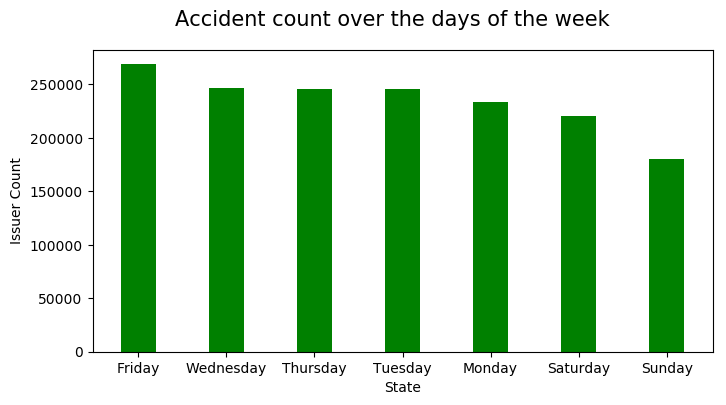

In [4]:
# Plot the data across each days
fig= plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Accident count over the days of the week', fontsize=15)
width = .4
plt.bar(Accident_days_count.label.index, Accident_days_count.Accident_Index,width, color="green",align='center')
LABELS = Accident_days_count.label
plt.xticks(Accident_days_count.label.index, LABELS)
plt.xlabel('State');
plt.ylabel('Issuer Count');
plt.show()

In [ ]:
accident_report.Date = pd.to_datetime(accident_report.Date) #takes time

In [ ]:
#accident_report.Date.dt.year
Accident_year = accident_report.groupby(accident_report.Date.dt.year)['Accident_Index'].count().reset_index()

In [ ]:
fig= plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Total Accidents over the year', fontsize=15, label ='Accident')
plt.plot(Accident_year.Date.index,Accident_year.Accident_Index, marker ='o')
plt.xlabel ("Years")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')

In [ ]:
# fetch the number of accident over the accident category
categorised_accident = accident_report.groupby([accident_report.Date.dt.year,accident_report.Accident_Severity])['Accident_Index'].count().reset_index()
categorised_accident = categorised_accident.sort_values('Date')

In [ ]:
# Plotting the graph

fig= plt.figure(figsize=(8,4), dpi=100)

fig.suptitle('Accident Category trends over the years', fontsize=15)

plt.plot(categorised_accident[(categorised_accident['Accident_Severity'] == 1)].Date,
         categorised_accident[(categorised_accident['Accident_Severity'] == 1)].Accident_Index , color="blue", label = 'Fatal', marker ='o')

plt.plot(categorised_accident[(categorised_accident['Accident_Severity'] == 2)].Date,
         categorised_accident[(categorised_accident['Accident_Severity'] == 2)].Accident_Index , color="green", label = 'Medium', marker ='o')

plt.plot(categorised_accident[(categorised_accident['Accident_Severity'] == 3)].Date,
         categorised_accident[(categorised_accident['Accident_Severity'] == 3)].Accident_Index , color="red", label = 'Slight', marker ='o')

plt.legend(loc='upper right')
plt.xlabel ("Years")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')

In [ ]:
# Get the number of accidents over districts
district_accident = accident_report.groupby(['Local_Authority_(District)'])['Accident_Index'].count().reset_index()
district_accident.rename(columns={'Local_Authority_(District)': 'District'}, inplace=True)
district_accident.head().reset_index(level=1, drop=True)

In [ ]:
# Get the values of the districts
location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
variables_Report1 = pd.read_excel(location, sheetname  ='Local Authority (District)')
district_accident = pd.merge(variables_Report1,district_accident, left_on =['code'],right_on=['District'],how='inner' )
district_accident = district_accident.sort_values('Accident_Index', ascending = False)
district_accident.reset_index(level=1, drop=True) 
district_accident.drop(district_accident.columns[[0, 2]], axis=1, inplace=True)
district_accident.reset_index(level=1, drop=True)
district_accident.head()

In [ ]:
# Get the top 20 districts with highest accidents
district_accident_top20 = district_accident[:20].reset_index(level=1, drop=True)
district_accident_top20.head()

In [ ]:
fig= plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Top 20 districts with maximum number of accidents', fontsize=15)
plt.bar(district_accident_top20.label.index,district_accident_top20.Accident_Index)
level = district_accident_top20['label'].unique()
plt.xticks(district_accident_top20.label.index, level,rotation=90)
plt.xlabel ("Cities")
plt.ylabel ("Count of Accidents")
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Get the number of accidents by police force
police_accident = accident_report.groupby(['Police_Force'])['Accident_Index'].count().reset_index()
location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
police_accident_var = pd.read_excel(location, sheetname  ='Police Force')
police_accident_var.head()

In [ ]:
# Get the police department list from police_accident_var and merge it to police_accident
police_accident = pd.merge(police_accident_var,police_accident, left_on =['code'],right_on=['Police_Force'],how='inner' )
police_accident.drop(police_accident.columns[[0, 2]], axis=1, inplace=True)
police_accident = police_accident.sort_values('Accident_Index', ascending =False).reset_index(level=1, drop=True)

In [ ]:
# fetch the list of top 20 police force
police_accident_top20 = police_accident[:20]
police_accident_top20.head()

In [ ]:
# Plot the graph of top 20 police force with high operations on accidents
fig= plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Top 20 Police Force with maximum number of accidents', fontsize=15)
plt.bar(police_accident_top20.label.index,police_accident_top20.Accident_Index)
LABELS = police_accident_top20['label'].unique()
plt.xticks(police_accident_top20.label.index, LABELS,rotation=90)
plt.xlabel ("Police Departments")
plt.ylabel ("Count of Accidents")
plt.show()

In [ ]:
# Analyse light conditions on roads, causing accident

light_accident= accident_report.groupby(['Local_Authority_(District)','Light_Conditions','Date'])['Accident_Index'].count().reset_index()
light_accident.rename(columns={'Local_Authority_(District)': 'District'}, inplace=True)
light_accident = pd.merge(variables_Report1,light_accident, left_on =['code'],right_on=['District'],how='inner' )

location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Road-Accident-Safety-Data-Guide.xls'
light_accident_var = pd.read_excel(location, sheetname  ='Light Conditions')


In [ ]:
light_accident.head()

In [ ]:
light_accident_var.head()

In [ ]:
district_accident_top20.head()

In [ ]:
# Get the light conditions merged with the accident data
light_accident_fil = light_accident[light_accident['label'].isin(district_accident_top20.label)].groupby([light_accident.Date.dt.year,light_accident.Light_Conditions,light_accident.label])['Accident_Index'].count().reset_index()
light_accident_fil = pd.merge(light_accident_var,light_accident_fil, left_on =['code'],right_on=['Light_Conditions'],how='inner' )
light_accident_fil.rename(columns={'label_y': 'District_name'}, inplace=True)
light_accident_fil.drop(light_accident_fil.columns[[0,3]], axis=1, inplace=True)
light_accident_fil.rename(columns={'label_x': 'Light_Conditions'}, inplace=True)
light_accident_fil = light_accident_fil.sort_values(['District_name','Date']).reset_index(drop=1)
light_accident_fil.head()

In [ ]:
#Pivot the values of districts with the lighting conditions
light_accident_fil_box1 =light_accident_fil[(light_accident_fil['Light_Conditions'] == 'Darkness - lights unlit')].pivot(index=None, columns='District_name', values='Accident_Index')
light_accident_fil_box2 =light_accident_fil[(light_accident_fil['Light_Conditions'] == 'Darkness - no lighting')].pivot(index=None, columns='District_name', values='Accident_Index')

In [ ]:
#reset the index
pivot_light_accident_fil_box1 = light_accident_fil_box1.reset_index(drop=1)
pivot_light_accident_fil_box2 = light_accident_fil_box2.reset_index(drop=1)

In [ ]:
#PLot the above pivot data for UNLIT LIGHTS conditions
fig = plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Accidents due to UNLIT LIGHTS \n across top 20 acident prone districts')
pivot_light_accident_fil_box1.boxplot( showfliers = True, return_type='axes', showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0,60)
plt.xlabel('State');
plt.ylabel('Count of accidents over the years');

In [ ]:
#PLot the above pivot data for NO LIGHTING conditions
fig = plt.figure(figsize=(15, 9), dpi=100)
fig.suptitle('Accidents due to NO LIGHTING \n across top 20 acident prone districts')
pivot_light_accident_fil_box2.boxplot( showfliers = True, return_type='axes', showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0,60)
plt.xlabel('State');
plt.ylabel('Count of accidents over the years');

In [ ]:
#Get the number of accidents over various age of the drivers

location = r'D:\Monash Post Graudate\Semester 1\Intro to Data Science\Assignment\Other Data\UK\Stats19_Data_2005-2014\Vehicles0514.csv'
Vehicles_report = pd.read_csv(location)
Vehicles_report.head()

fig = plt.figure(figsize=(8,4), dpi=100)
fig.suptitle('Distribution of age of drivers across Accidents')

# Clean the age values of the driver and observe the distribution
Vehicles_report[(Vehicles_report.Age_of_Driver >10) & (Vehicles_report.Age_of_Driver < 65) ].Age_of_Driver.hist(bins =30)

plt.ylabel('Frequency');
plt.xlabel('Age');

# References : Stackoverflow 
    https://stackoverflow.com/questions/23891575/in-python-pandas-how-to-merge-two-frames-side-by-side
    https://stackoverflow.com/questions/28385184/how-to-set-the-xticklabels-for-date-in-matplotlib
    https://stackoverflow.com/questions/9651367/manually-setting-xticks-with-xaxis-date-in-python-matplotlib
    https://stackoverflow.com/questions/24644656/how-to-print-dataframe-without-index
    https://stackoverflow.com/questions/22005911/convert-columns-to-string-in-pandas
    https://stackoverflow.com/questions/39785468/plotting-more-than-two-columns-in-python-using-panda-from-a-csv-file
    https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    https://pandas.pydata.org/pandas-docs/stable/10min.html
    http://matplotlib.org/1.3.1/users/annotations_intro.html
    http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html